# Final project: Predict whether income exceeds $50K/yr.

**Data Set Information:**

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

**Attribute Information:**

Listing of attributes:

* earn: >50K, <=50K (**Target atribute**)

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [1]:
#Import main libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

We will use **adult.data** from UCI ML repository: https://archive.ics.uci.edu/ml/datasets/Census+Income

In [2]:
#Load DataSet
df_adult = pd.read_csv("data/adult.data",sep=',',header=None)

## 1.Exploratory data analysis

In [3]:
#DataFrame visualization
df_adult.sample(n=5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
18971,32,Private,133861,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,13550,0,48,United-States,>50K
30158,29,?,208406,HS-grad,9,Never-married,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
6056,42,Private,108502,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,42,United-States,<=50K
21975,57,Private,79830,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K
31329,28,Local-gov,138332,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [4]:
#Dataframe size:
print('Size DF: ',df_adult.shape)

Size DF:  (32561, 15)


**OBS:**
* There are not header for each feature (column). So, it will be necesary to rename each column.

In [5]:
#Set headers for each feature (reference website):
col_names = ["age","workclass","fnlwgt","education","education-num","marital-status",
             "occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","earn"]
df_adult.columns = col_names

In [6]:
#Verify Changes:
df_adult.sample(n=5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earn
89,43,Federal-gov,410867,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
8276,23,Private,664670,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
10789,34,Private,133503,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,2174,0,40,United-States,<=50K
3988,52,Private,192390,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
108,31,Local-gov,189265,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [7]:
#Check data Type
df_adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
earn              object
dtype: object

**OBS:**
* There are 6 numeric variables and 9 categorical variable.
* Target variable is "earn".

In [8]:
# Let us explore more about "earn" variable:
df_adult['earn'].value_counts()

earn
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

**OBS:**
* Consider that target variable is not balanced in DataSet.

In [9]:
#Check for missing Values:
df_adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
earn              0
dtype: int64

**OBS:**
* There are not missing values.

## 2.Data Balancing (undersampling)

In [10]:
#Import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

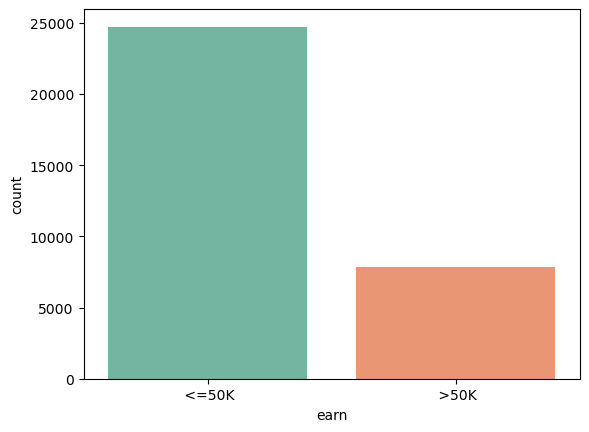

In [11]:
#Plot unbalanced dataset ratio:
sns.countplot(x=df_adult['earn'], palette='Set2')
plt.show()

In [12]:
#Split DataFrmae into 'Data' and 'Target':
Data = df_adult.drop('earn', axis=1)
Target = df_adult['earn']

#Create and fit undersample model:
undersample = RandomUnderSampler(random_state=42)

Data_und_samp , Target_und_samp = undersample.fit_resample(Data,Target)

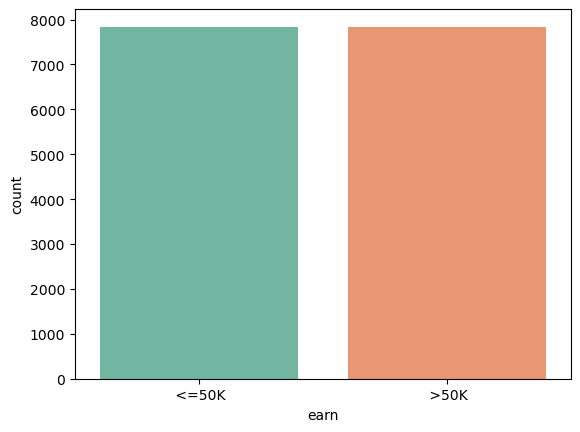

new dataframe dimension: (15682, 15)


In [13]:
#Join data and target undersampled:
df_adult_bal = Data_und_samp
df_adult_bal['earn'] = Target_und_samp

#Plot balanced dataset:
sns.countplot(x=df_adult_bal['earn'], palette='Set2')
plt.show()
print('new dataframe dimension:',df_adult_bal.shape)

## 3.Correlation and Outliers





Let us briefly analyze the correlation between variables and the presence of any outliers.

In [14]:
#Import Ordinal Encoder from scikit-learn
from sklearn.preprocessing import OrdinalEncoder

In [15]:
#Create a copy from original DataSet
df_adult_enc = df_adult_bal.copy(deep=True)

In [16]:
#Create and fit ordinal encoder:
oc = OrdinalEncoder()
df_adult_enc = pd.DataFrame(oc.fit_transform(df_adult_enc), columns =col_names)
df_adult_enc.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earn
0,15.0,4.0,696.0,15.0,9.0,0.0,5.0,1.0,4.0,0.0,0.0,18.0,53.0,38.0,0.0
1,2.0,0.0,6044.0,11.0,8.0,4.0,0.0,3.0,2.0,0.0,0.0,0.0,24.0,38.0,0.0
2,34.0,4.0,10577.0,9.0,12.0,0.0,10.0,1.0,4.0,1.0,0.0,0.0,44.0,38.0,0.0
3,10.0,4.0,4644.0,11.0,8.0,4.0,8.0,1.0,4.0,0.0,0.0,0.0,41.0,38.0,0.0
4,47.0,6.0,5296.0,15.0,9.0,6.0,3.0,1.0,4.0,0.0,0.0,0.0,7.0,38.0,0.0


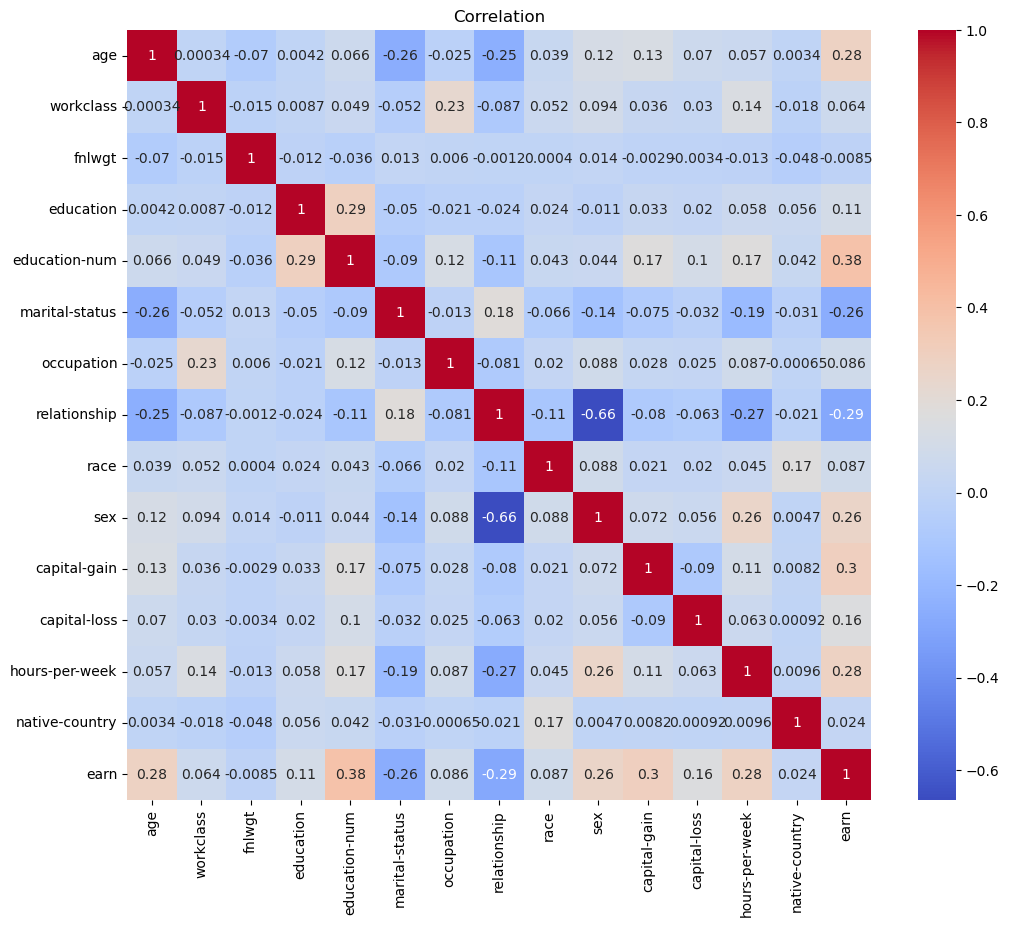

In [17]:
#Heatmap for correlation:
fig = plt.figure(figsize=(12,10))
sns.heatmap(df_adult_enc.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation')
plt.show()

**OBS:**
* Apparently, some feature like 'fnlwgt', 'race' or 'native-country' have low correlation with target feature 'earn'.

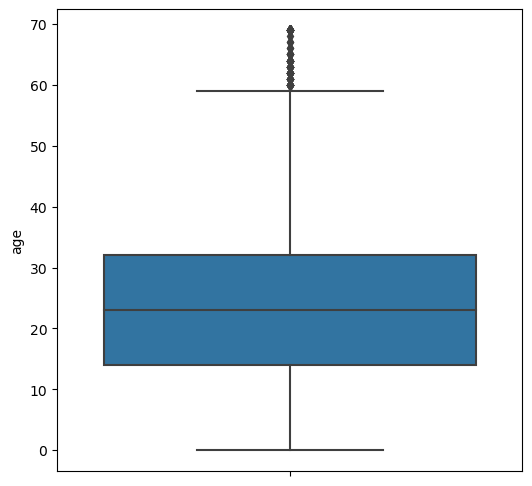

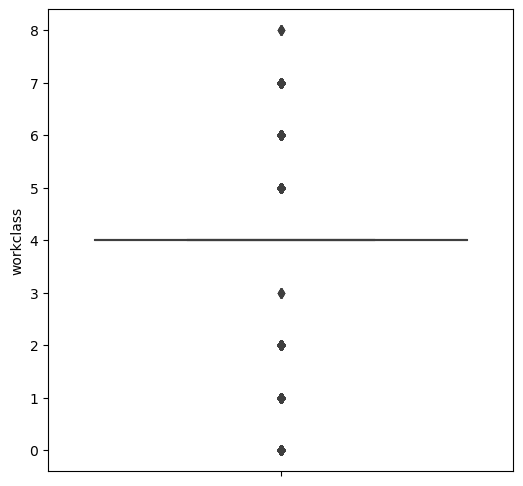

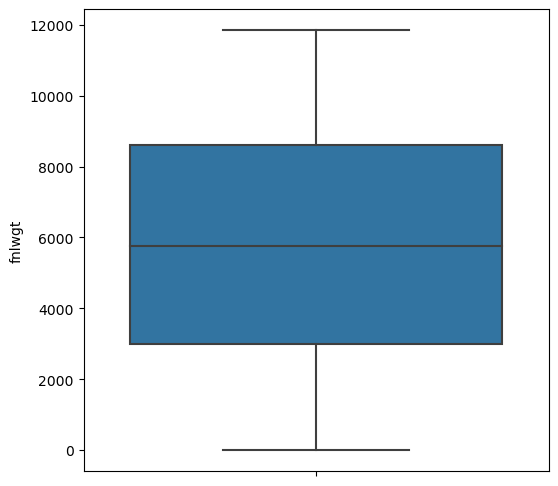

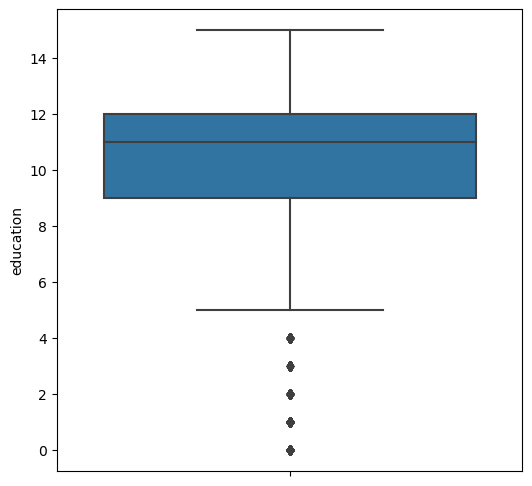

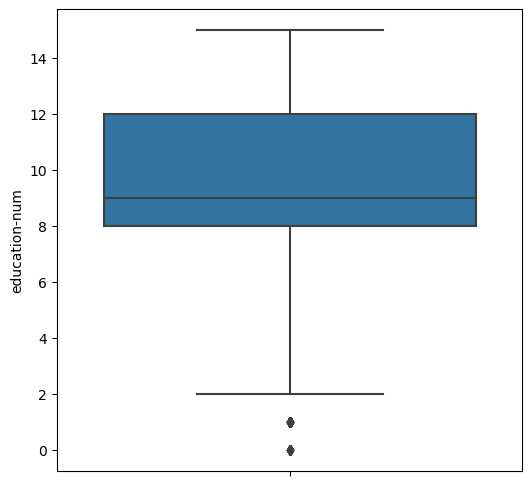

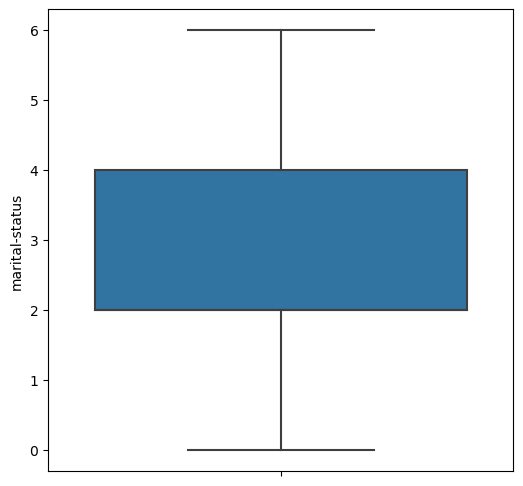

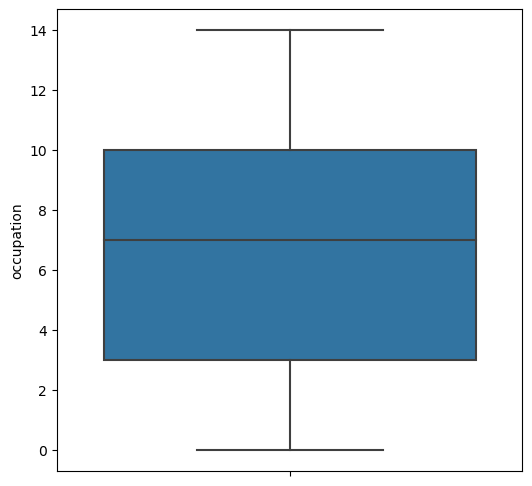

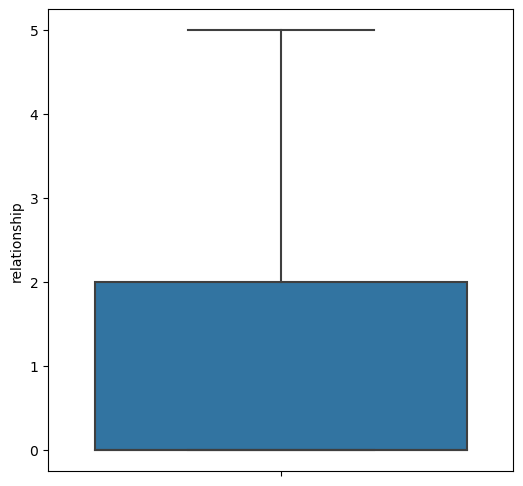

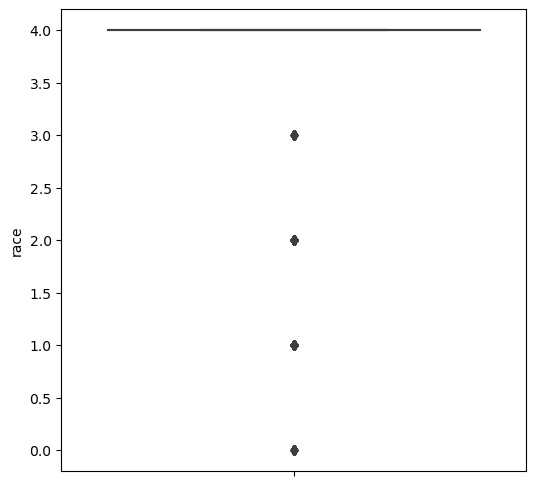

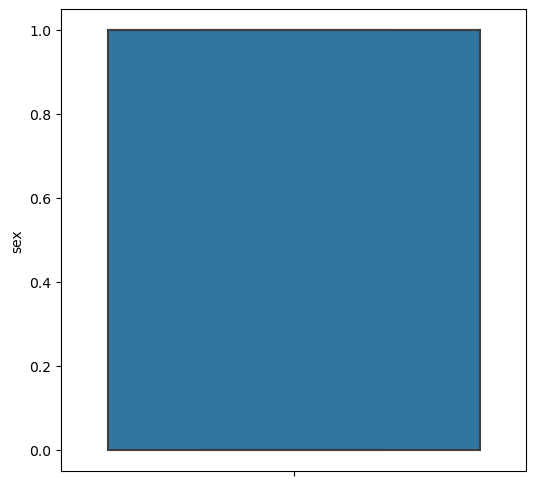

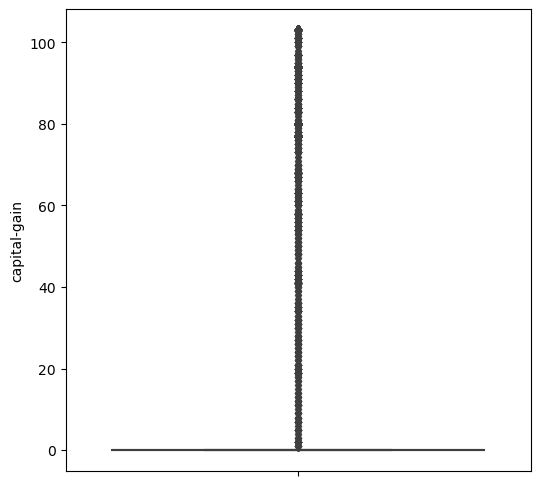

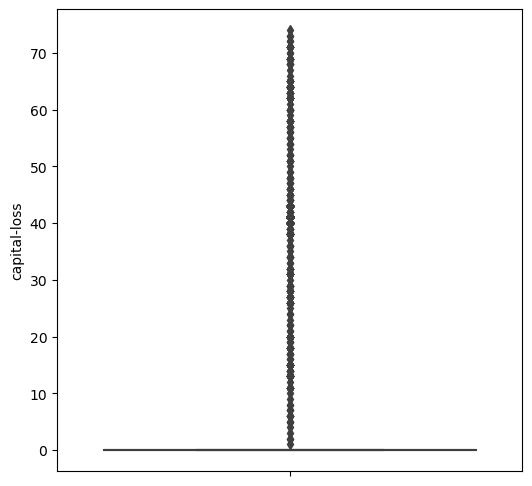

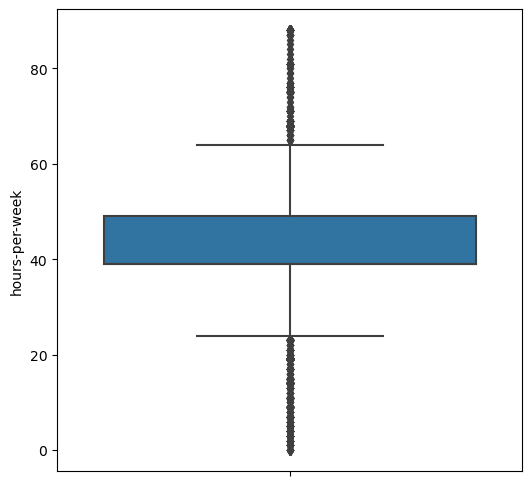

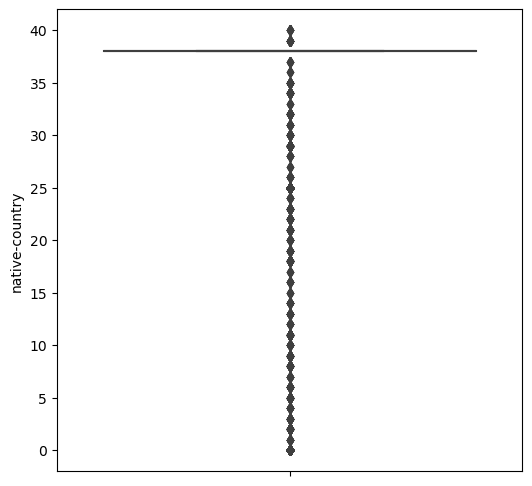

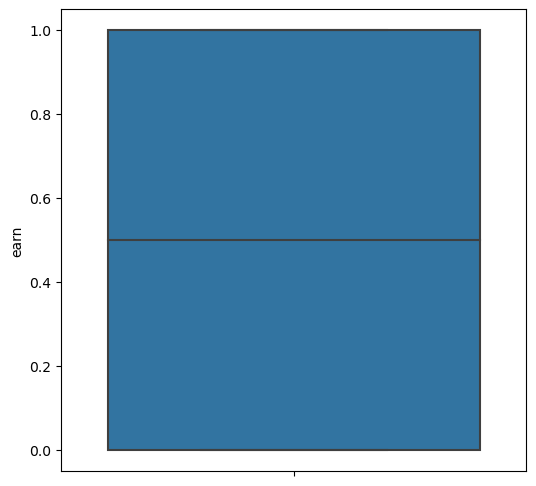

In [18]:
#let us check for outliers:
for i in col_names:
  plt.figure(figsize=(6,6))
  sns.boxplot(data=df_adult_enc, y=i)
  plt.show()

**OBS:**

* There are some outliers for 'age', 'education'and education-num'. We will continue with data processing. 

## 4.Data Processing

In [19]:
#Separete Data Frame into 'x' variable and 'y' variable: 
X = df_adult_bal.drop(['earn'],axis=1)
y = df_adult_bal['earn']

In [20]:
#Libraries to create the model:
from sklearn.model_selection import train_test_split

#Set 30% for 'test' and 70% for 'train':
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=43)

In [21]:
#Check the size of train and test:
X_train.shape, X_test.shape

((10977, 14), (4705, 14))

In [22]:
y_train.shape, y_test.shape

((10977,), (4705,))

In [23]:
#Let us check the content of x_train:
X_train.sample(n=5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
13775,37,Private,120590,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States
7444,22,?,88126,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States
83,32,Private,176998,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
11529,47,Private,162034,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States
9060,31,Private,259425,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States


In [24]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

**OBS:**
* we have numeric and categorical variables for 'X' (train and test). In order to continue with the algorithms, we will code the categorical variable.

## 5.Training model : Decision Tree

In [25]:
#import category_encoders:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [26]:
#Check transformation:
X_train.sample(n=5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
14167,54,6,198741,2,10,3,12,3,1,1,0,0,40,1
13287,56,1,220187,2,10,3,4,3,1,1,0,0,45,1
4363,54,1,240542,2,10,2,4,4,1,2,0,0,48,1
14541,31,1,151053,2,10,3,5,3,1,1,5178,0,40,1
4582,40,6,141583,2,10,2,6,4,2,2,0,0,35,1


In [27]:
#Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Create mode, depth=2 (x_train <5k)
tree = DecisionTreeClassifier(max_depth=2, random_state=43)

In [28]:
#Training:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=43)

In [29]:
#Calculate predictions for Train and Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

### 5.1.Evaluation model: Decision Tree

In [30]:
#Import metrics: 
from sklearn.metrics import accuracy_score

#Accuracy for Train and test:
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('Train Accuracy:', train_accuracy_tree.round(4)*100,'%')
print('Test Accuracy:', test_accuracy_tree.round(4)*100,'%')

Train Accuracy: 75.81 %
Test Accuracy: 74.81 %


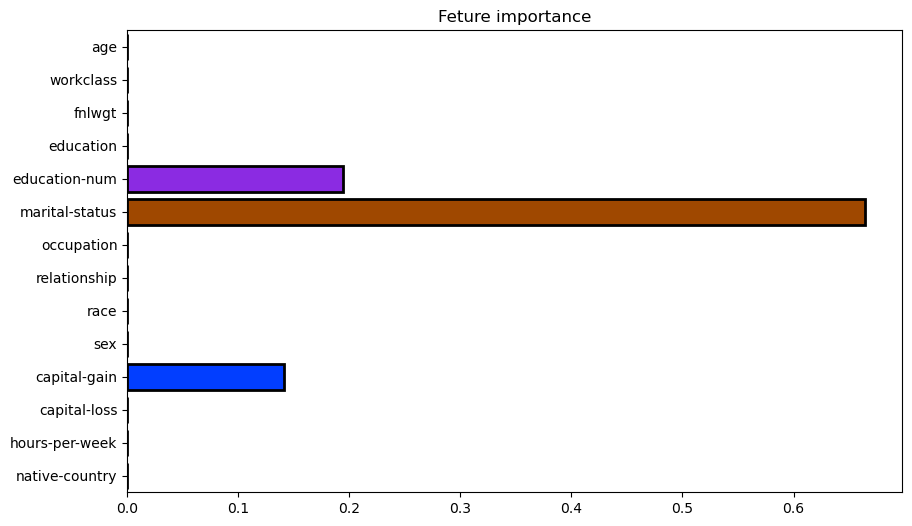

In [31]:
#More important features:
importances = tree.feature_importances_
columns = X.columns
plt.figure(figsize=(10,6))
sns.barplot(y=columns, x=importances, palette='bright', saturation=2.0, edgecolor='black',linewidth=2)
plt.title('Feture importance')
plt.show()

**OBS:**
* Using "Desicion Tree model", apparently features "marital-status", "education-num" and "capital-gain" have more importace.

* Consider that accuracy for Train and test are too similar.

* Comparing "Feature Importances" and "Correlation" there are some feature like 'education' or 'sex' that should be compared.

## 5.Training model : Random Forest

In [32]:
#Import random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state=43)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=43)

In [33]:
#Predictions for Random Forest:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

### 5.1.Evaluation model: Random Forest

In [34]:
#Import metrics (if needed)
from sklearn.metrics import accuracy_score

#Accuracy for Train and Test:
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('Accuracy_train: ',train_accuracy_rf.round(4)*100)
print('Accuracy_test: ',test_accuracy_rf.round(4)*100)

#Important: we could reduce estimators numbers to avoid overfitting

Accuracy_train:  99.05000000000001
Accuracy_test:  80.17


**OBS:**
* "Accuracy_Test" improved using Random Forest, but "Accuracy_train" is almost overfitting. 

In [35]:
# More Important Features:
features_scores = pd.Series(rf.feature_importances_,
                            index =X_train.columns).sort_values(ascending=False)
features_scores

age               0.150495
fnlwgt            0.135589
relationship      0.123610
marital-status    0.106924
education-num     0.100125
hours-per-week    0.089440
capital-gain      0.080946
occupation        0.071170
education         0.035953
workclass         0.033577
capital-loss      0.024029
native-country    0.018158
race              0.015473
sex               0.014510
dtype: float64

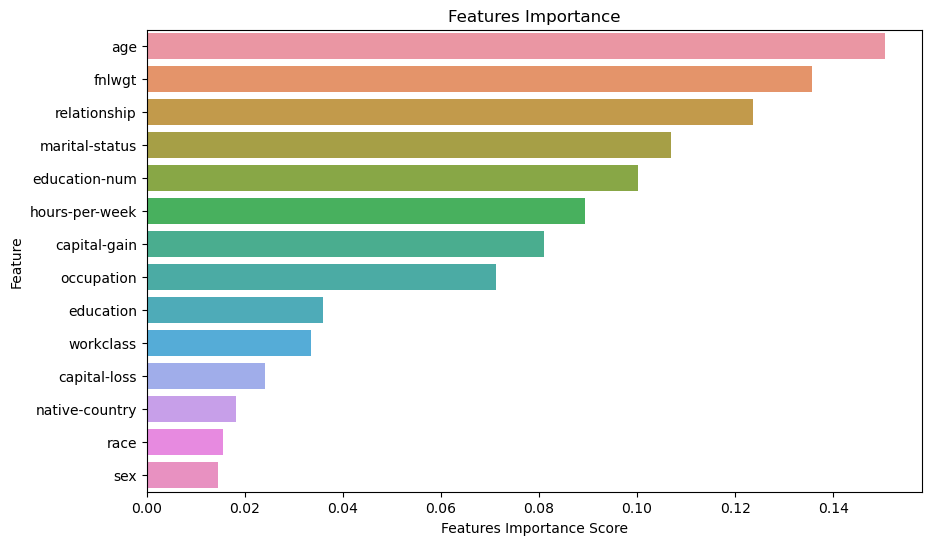

In [36]:
#BarPlot:
plt.figure(figsize=(10,6))
sns.barplot(x=features_scores, y=features_scores.index)
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title('Features Importance')
plt.show()

**OBS:**
* Using random forest algorithm, feature like 'fnlwgt' and 'age' become more relevant than 'capital-gain'.

* 'education-num', 'relationship', 'hours-per-week' become more relevant than 'marital-stauts'.

In [37]:
# Confusion Matrix for Ranfom Forest
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
print('Matriz de confusion: \n\n',cm)

Matriz de confusion: 

 [[1895  427]
 [ 506 1877]]


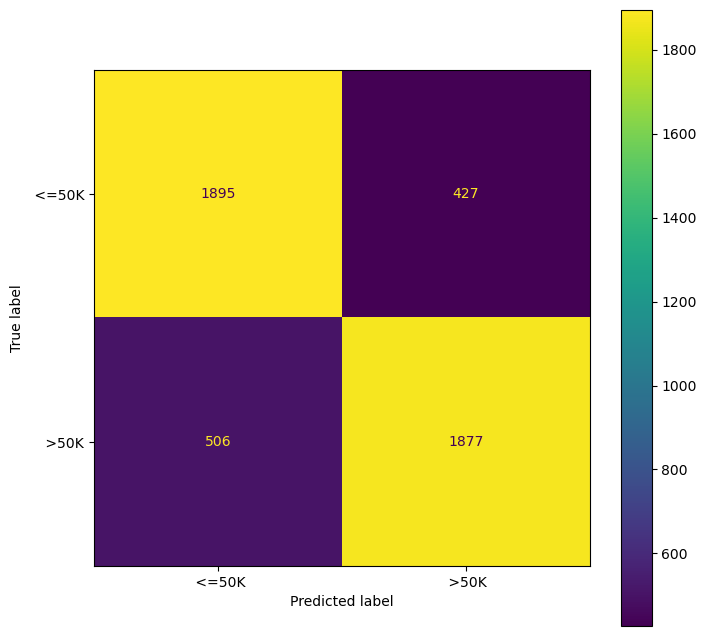

In [38]:
#Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm, display_labels =rf.classes_)
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax)
plt.show()


In [39]:
#Random Forest Metrics:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

       <=50K       0.79      0.82      0.80      2322
        >50K       0.81      0.79      0.80      2383

    accuracy                           0.80      4705
   macro avg       0.80      0.80      0.80      4705
weighted avg       0.80      0.80      0.80      4705



**Final Observations:**

* "Random Forest provides higher precision compared to Decision Tree, but there are some factors to consider."
* "Random undersampling of the dataframe during training may influence the results."
* "The dataframe contains '?' values in multiple features."
* "When comparing the 'Correlation' and 'Random Forest Feature Importance' methods, there are many similarities, except for the feature 'fnlwgt' Further investigation is needed to understand the relevance of this feature."